In [193]:
!pip install -q scikit-learn

In [194]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
import pandas as pd
from sklearn.model_selection import train_test_split


In [195]:
# Проверяем что у нас работает GPU
tf.test.gpu_device_name()

''

In [196]:
#GPU count and name
!nvidia-smi -L

GPU 0: NVIDIA GeForce GTX 1060 with Max-Q Design (UUID: GPU-91043752-bc7a-8fb0-b6a4-37b7a161dcd1)


# Загрузим данные

Классы:
```
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
```

In [197]:
# base_dir = '/kaggle/input/dl2025miptml/fashion-mnist-testn'
base_dir = 'data/fashion-mnist-testn'
out_dir = base_dir

In [198]:
df = pd.read_csv(f'{base_dir}/fmnist_train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17040 entries, 0 to 17039
Columns: 786 entries, label to Id
dtypes: float64(424), int64(362)
memory usage: 102.2 MB


In [199]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
count,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,...,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000,17040.000000
mean,4.486913,0.002347,0.005869,0.028991,0.114495,0.233275,0.372946,0.725352,2.167077,5.751995,...,23.532308,16.799519,17.331886,22.342332,17.985328,8.849111,2.964435,0.961265,0.088738,8519.500000
std,2.881984,0.172991,0.209439,0.621885,2.630319,4.060619,5.337305,7.395038,13.906113,24.238699,...,48.730232,41.825340,43.064804,51.111173,45.379001,30.228846,18.003959,9.866697,2.342414,4919.168629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4259.750000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8519.500000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12779.250000
max,9.000000,16.000000,16.000000,56.000000,164.000000,217.000000,230.000000,213.000000,218.000000,254.000000,...,255.000000,254.000000,255.000000,252.000000,255.000000,250.000000,255.000000,255.000000,170.000000,17039.000000


In [200]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [201]:
# Подсчёт строк, в которых есть хотя бы один пропуск
rows_with_nulls = df.isnull().any(axis=1).sum()
print(rows_with_nulls)  # Выведет количество строк с пропусками

1


In [202]:
df = df.dropna()
df.shape

(17039, 786)

In [203]:
df['label'].value_counts()

label
0    1770
7    1761
3    1725
6    1704
1    1700
9    1694
5    1694
2    1677
8    1675
4    1639
Name: count, dtype: int64

In [204]:

# Загружаем данные (например, признаки X и целевую переменную y)
X = df.drop(columns=['label', 'Id'])  # Все колонки, кроме целевой
y = df['label']                # Целевая переменная

# Разделяем данные (например, 80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2,        # Доля валидационной выборки (20%)
    random_state=42,      # Фиксируем случайность для воспроизводимости
    stratify=y           # Сохраняет распределение классов (для классификации)
)


In [205]:
print(x_train.shape)
print(x_val.shape)
print (y_train[:10])
print (y_val[:10])

(13631, 784)
(3408, 784)
11602    4
16071    8
10905    6
9949     5
12702    3
15076    5
2859     5
10791    1
16789    3
7696     8
Name: label, dtype: int64
11016    8
6403     5
7350     7
3501     4
7663     8
6035     0
7426     3
2420     3
15236    4
4667     6
Name: label, dtype: int64


In [206]:
x_train = x_train.to_numpy().reshape(-1, 28, 28)
x_val = x_val.to_numpy().reshape(-1, 28, 28)
print(x_train.shape)
print(x_val.shape)

(13631, 28, 28)
(3408, 28, 28)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..242.0].


Пример кусочка картинки:


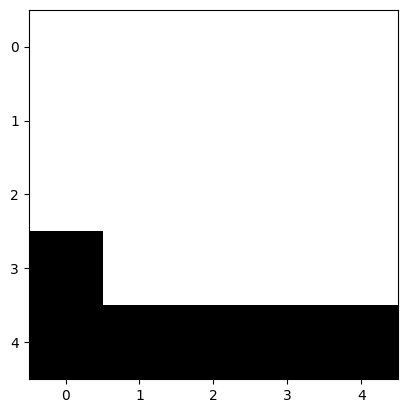

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Пример картинки:


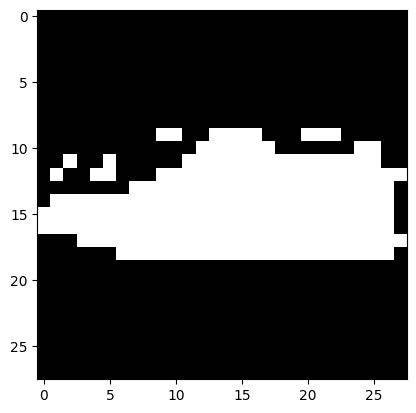

y_train [shape (13631,)] 10 примеров:
 11602    4
16071    8
10905    6
9949     5
12702    3
15076    5
2859     5
10791    1
16789    3
7696     8
Name: label, dtype: int64


In [207]:
x_train_image = np.tile(x_train[5, :, :].reshape((28, 28))[:, :, np.newaxis], (1, 1, 3))
print("Пример кусочка картинки:")
plt.imshow(x_train_image[15:20, 5:10], cmap="Greys")
plt.show()
print("Пример картинки:")
plt.imshow(x_train_image, cmap="Greys")
plt.show()
print("y_train [shape %s] 10 примеров:\n" % (str(y_train.shape)), y_train[:10])

In [208]:
# one-hot encode для ответов
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:5], y_train[:5])

(13631, 10)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] 11602    4
16071    8
10905    6
9949     5
12702    3
Name: label, dtype: int64


# Собираем модель

Будем как и в предыдущем модуле минимизировать кросс-энтропию.

In [ ]:
K.clear_session()

# в этот раз используем картинку как вход без вытягивания в вектор!

model = M.Sequential()
model.add(L.Conv2D(16, kernel_size=3, strides=1, padding='same', input_shape=(28, 28, 1)))
model.add(L.MaxPool2D())
model.add(L.Conv2D(32, kernel_size=3, strides=1, padding='same'))
model.add(L.MaxPool2D())
model.add(L.Conv2D(64, kernel_size=3, strides=1, padding='same'))
model.add(L.MaxPool2D())
model.add(L.Conv2D(128, kernel_size=3, strides=1, padding='same'))
model.add(L.MaxPool2D())
model.add(L.Conv2D(256, kernel_size=3, strides=1, padding='same'))
model.add(L.Flatten())
model.add(L.Dense(10, activation='softmax'))

d:\repo\miphi\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [210]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1, 1, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 1, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,577,610 (6.02 MB)

 Trainable params: 1,577,610 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [211]:
model.compile(
    loss='categorical_crossentropy',  # минимизируем кросс-энтропию
    optimizer='adam',  # так будет быстрее, позже узнаем что это :)
    metrics=['accuracy']  # выводим процент правильных ответов
)

In [212]:
# центрируем и нормируем, так сети будет проще учиться (позже узнаем почему :)
x_train_float = x_train.astype(np.float32) / 255 - 0.5
x_val_float = x_val.astype(np.float32) / 255 - 0.5

In [213]:
model.fit(
    x_train_float[:, :, :, np.newaxis],
    y_train_oh,
    batch_size=32,
    epochs=7,
    validation_data=(x_val_float[:, :, :, np.newaxis], y_val_oh)
)

Epoch 1/7
426/426 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.6131 - loss: 1.0101 - val_accuracy: 0.8307 - val_loss: 0.4661
Epoch 2/7
426/426 ━━━━━━━━━━━━━━━━━━━━ 31s 72ms/step - accuracy: 0.8351 - loss: 0.4490 - val_accuracy: 0.8451 - val_loss: 0.4304
Epoch 3/7
426/426 ━━━━━━━━━━━━━━━━━━━━ 31s 72ms/step - accuracy: 0.8687 - loss: 0.3527 - val_accuracy: 0.8765 - val_loss: 0.3601
Epoch 4/7
426/426 ━━━━━━━━━━━━━━━━━━━━ 31s 72ms/step - accuracy: 0.8955 - loss: 0.2910 - val_accuracy: 0.8703 - val_loss: 0.3778
Epoch 5/7
426/426 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.9087 - loss: 0.2419 - val_accuracy: 0.8721 - val_loss: 0.3899
Epoch 6/7
426/426 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.9200 - loss: 0.2241 - val_accuracy: 0.8806 - val_loss: 0.3515
Epoch 7/7
426/426 ━━━━━━━━━━━━━━━━━━━━ 32s 75ms/step - accuracy: 0.9294 - loss: 0.1942 - val_accuracy: 0.8812 - val_loss: 0.3695


In [214]:
test_df = pd.read_csv(f'{base_dir}/fmnist_test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, pixel1 to Id
dtypes: int64(785)
memory usage: 59.9 MB


In [215]:
test_np = test_df.drop(columns=['Id']).to_numpy().reshape(-1, 28, 28)
ids = test_df['Id'].to_numpy()

In [216]:
res_raw = model.predict(test_np)
res = tf.argmax(res_raw, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [217]:
res_df = pd.DataFrame({
    'Id': ids,
    'label': res.numpy()
})
res_df.head()

,Id,label
0,0,0
1,1,1
2,2,2
3,3,6
4,4,2


In [218]:
res_df.to_csv(f'{out_dir}/submission.csv', index=False)